<a href="https://colab.research.google.com/github/2303A52012/AIML_2303A52012/blob/main/Lab6(withAnotherDataSet)_AIML(2303A52012).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor Classification

### Import packages and data set

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("/content/synthetic_covid_impact_on_work.csv")
df.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Team_Collaboration_Challenges  10000 non-null  

In [3]:
df.describe()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0
mean,0.676900,0.803300,8.006538,3.976717,0.50220,0.301100,0.404900,0.396700,0.50220,0.605100,0.194800,0.700600,1.0
std,0.467684,0.397523,1.978468,1.521594,0.50002,0.458759,0.490897,0.489237,0.50002,0.488854,0.396066,0.458018,0.0
min,0.000000,0.000000,0.287249,-2.698406,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,6.648484,2.924896,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,8.010864,3.981344,1.00000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.0
75%,1.000000,1.000000,9.348860,5.024619,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,16.958169,9.591750,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0


### Check the spread of the features

In [4]:
li=list(df.columns)
li[0:len(li)-1]

['Increased_Work_Hours',
 'Work_From_Home',
 'Hours_Worked_Per_Day',
 'Meetings_Per_Day',
 'Productivity_Change',
 'Stress_Level',
 'Health_Issue',
 'Job_Security',
 'Childcare_Responsibilities',
 'Commuting_Changes',
 'Technology_Adaptation',
 'Salary_Changes',
 'Team_Collaboration_Challenges',
 'Sector']

In [5]:
l=['Stress_Level','Sector']
for i in l:
    print(f"the set of value in \"{i}\" are {sorted(set(df[i]))}")
    print(f"the length of set of {i} is {len(set(df[i]))}\nso we have {len(set(df[i]))} types of data values for {i}\n")
    print("frequency:")
    print(df[i].value_counts())
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

the set of value in "Stress_Level" are ['High', 'Low', 'Medium']
the length of set of Stress_Level is 3
so we have 3 types of data values for Stress_Level

frequency:
Stress_Level
Medium    4956
High      3036
Low       2008
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
the set of value in "Sector" are ['Education', 'Healthcare', 'IT', 'Retail']
the length of set of Sector is 4
so we have 4 types of data values for Sector

frequency:
Sector
IT            2546
Healthcare    2498
Education     2484
Retail        2472
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
l=['Stress_Level','Sector']
for i in l:
    df[i]= label_encoder.fit_transform(df[i])

In [7]:
for i in l:
    print(df[i].value_counts())

Stress_Level
2    4956
0    3036
1    2008
Name: count, dtype: int64
Sector
2    2546
1    2498
0    2484
3    2472
Name: count, dtype: int64


In [8]:
df.describe()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,0.676900,0.803300,8.006538,3.976717,0.50220,1.192000,0.301100,0.404900,0.396700,0.50220,0.605100,0.194800,0.700600,1.500600,1.0
std,0.467684,0.397523,1.978468,1.521594,0.50002,0.873162,0.458759,0.490897,0.489237,0.50002,0.488854,0.396066,0.458018,1.114147,0.0
min,0.000000,0.000000,0.287249,-2.698406,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,6.648484,2.924896,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.0
50%,1.000000,1.000000,8.010864,3.981344,1.00000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,2.000000,1.0
75%,1.000000,1.000000,9.348860,5.024619,1.00000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,2.000000,1.0
max,1.000000,1.000000,16.958169,9.591750,1.00000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,3.000000,1.0


**Run a 'for' loop to draw boxlots of all the features for '0' and '1' TARGET CLASS**

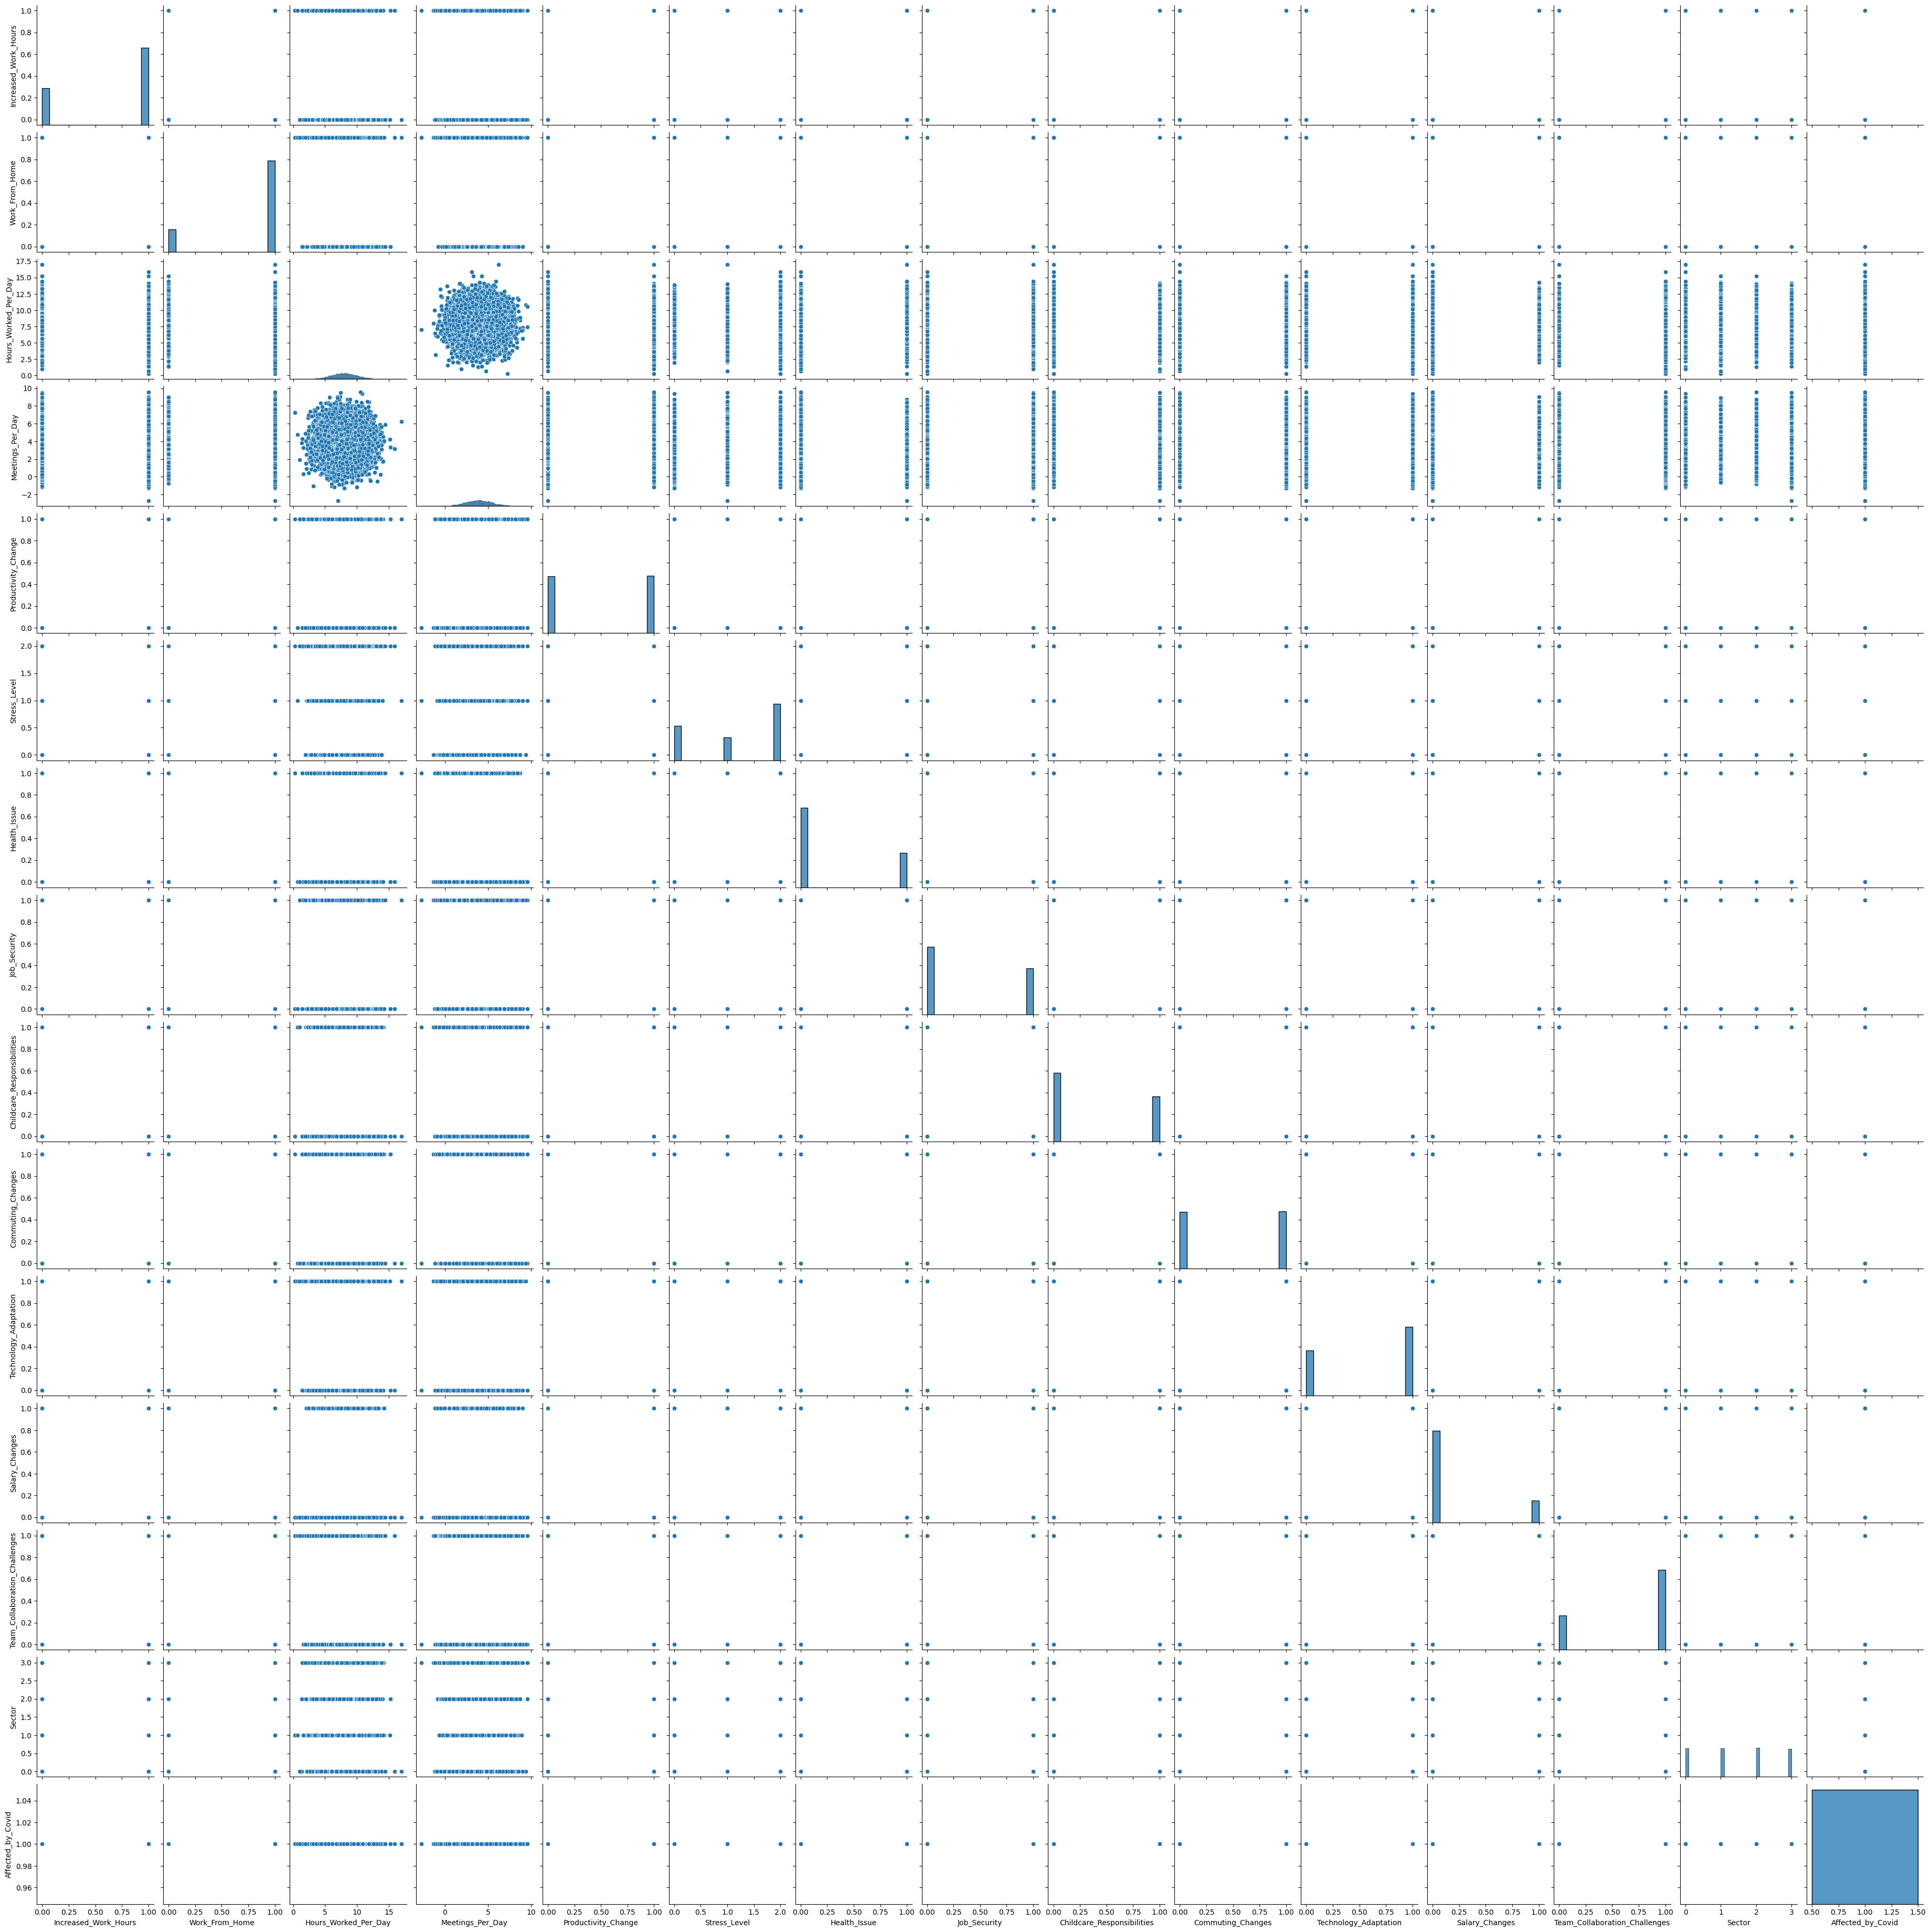

In [9]:
sns.pairplot(df)

### Identify the Target Classes from the Dataset and their Counts

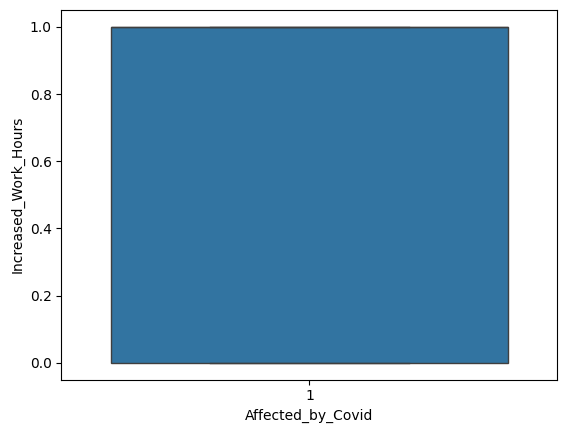

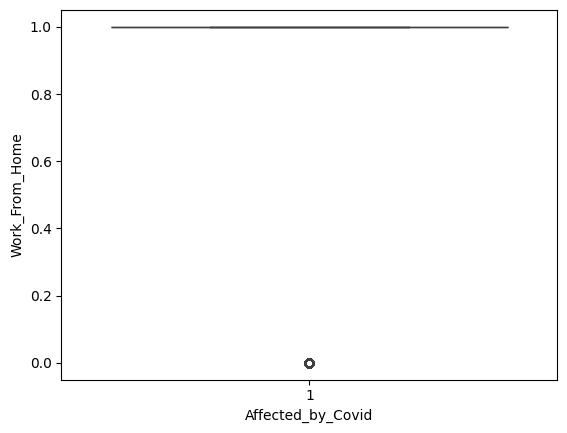

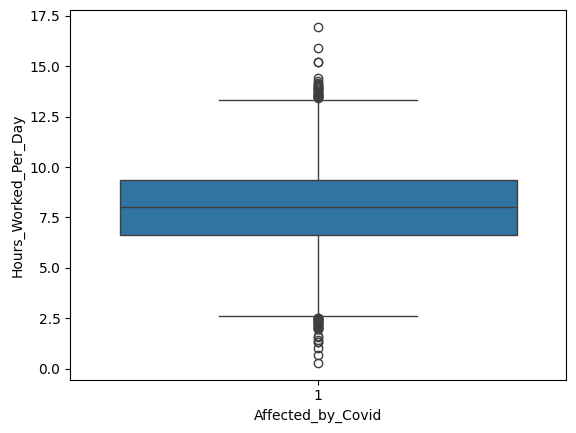

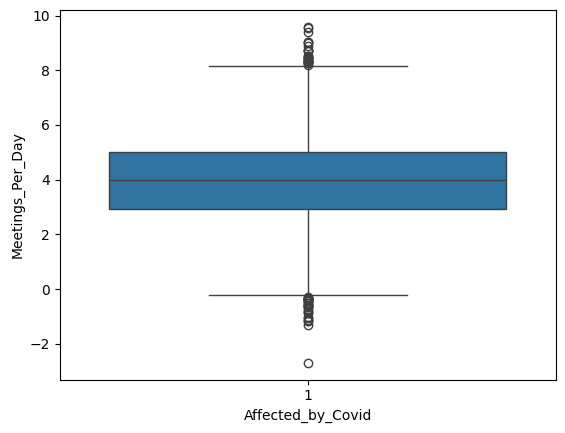

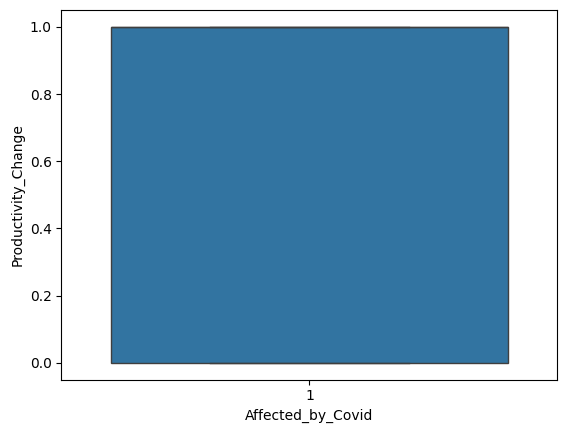

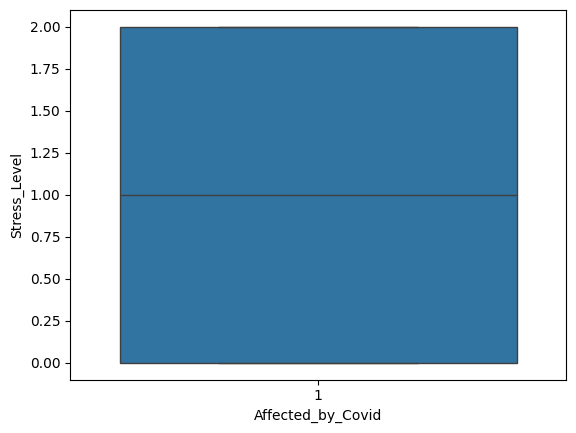

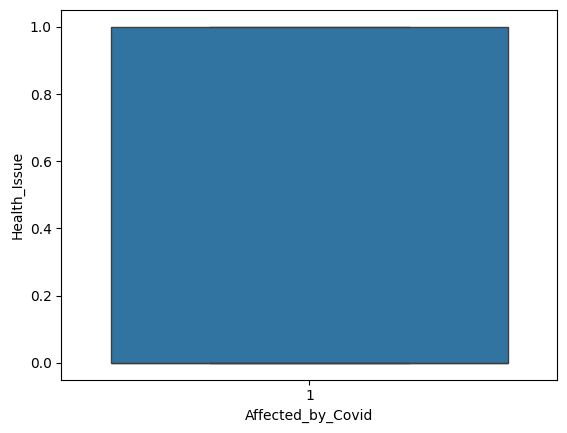

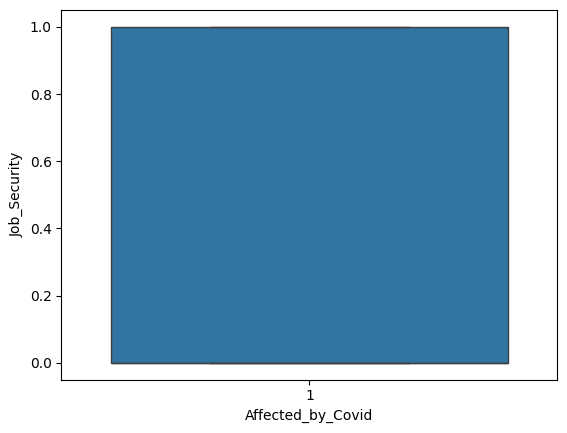

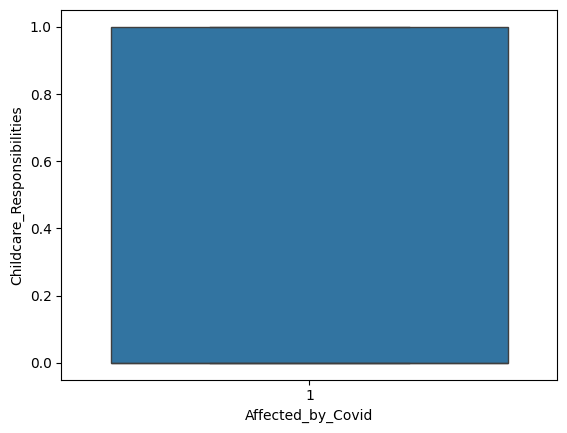

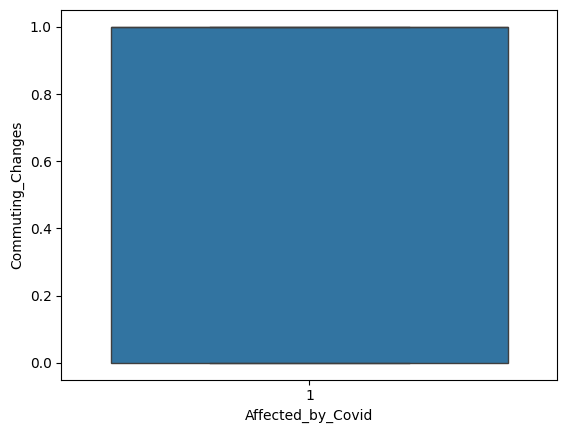

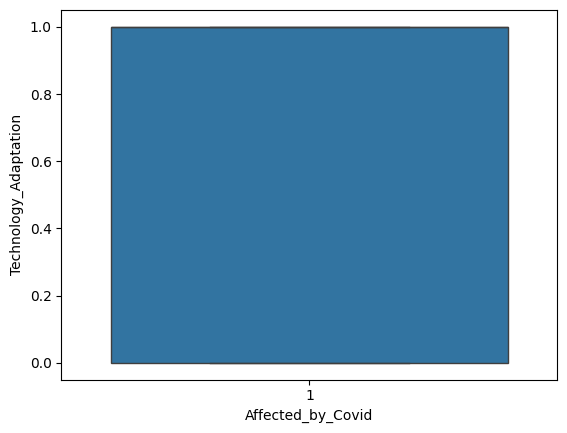

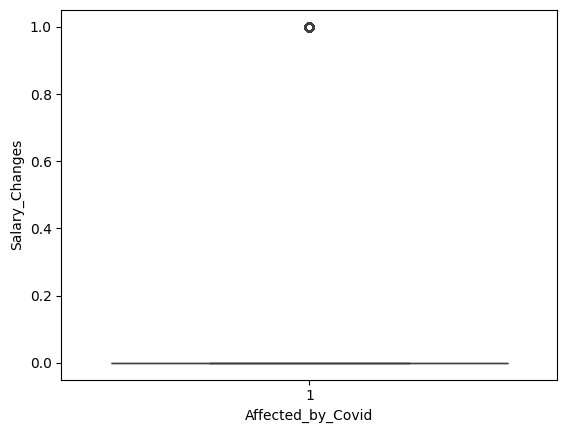

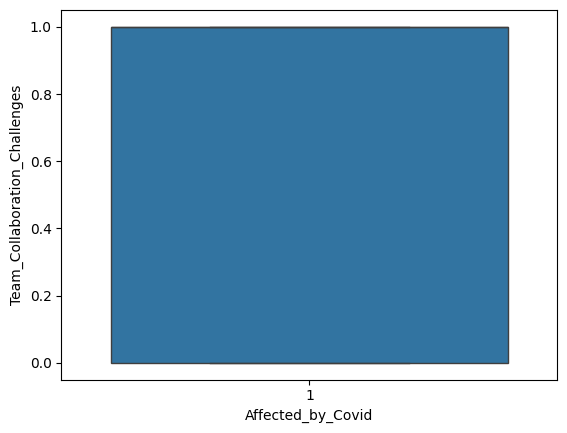

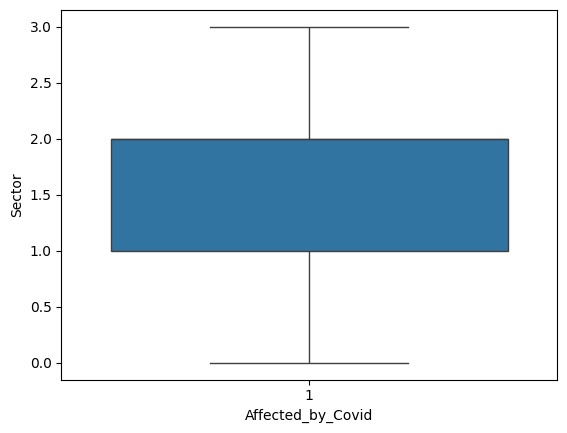

<Figure size 640x480 with 0 Axes>

In [22]:
for i in range(len(li)-1):
    sns.boxplot(x='Affected_by_Covid', y=li[i], data=df)
    plt.figure()

### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the features data only to this estimator <br>
(leaving the TARGET CLASS column) and transform**

In [12]:
scaler.fit(df.drop('Affected_by_Covid',axis=1))
scaled_features = scaler.transform(df.drop('Affected_by_Covid',axis=1))

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector
0,0.690886,0.494838,-0.815896,-0.849233,0.99561,-0.219901,-0.656369,-0.824857,1.233206,0.99561,0.807849,-0.491861,0.653719,1.345850
1,0.690886,0.494838,0.589094,-0.418985,0.99561,-0.219901,-0.656369,1.212331,-0.810895,0.99561,0.807849,-0.491861,0.653719,0.448258
2,0.690886,-2.020862,1.317258,-1.155678,-1.00441,0.925418,-0.656369,-0.824857,-0.810895,-1.00441,-1.237856,-0.491861,-1.529710,1.345850
3,0.690886,0.494838,-1.243635,0.771499,-1.00441,0.925418,-0.656369,-0.824857,-0.810895,0.99561,-1.237856,-0.491861,-1.529710,-1.346927
4,-1.447417,0.494838,1.727725,-0.562328,0.99561,0.925418,-0.656369,1.212331,1.233206,0.99561,-1.237856,2.033094,0.653719,-1.346927


### Train/Test split, model fit and prediction

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X = df_feat
y = df['Affected_by_Covid']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                 test_size=0.30, random_state=101)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = knn.predict(X_test)

**Evaluation of classification quality**

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[3000]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [19]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.0


**Choosing 'k' by elbow method**

In [20]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

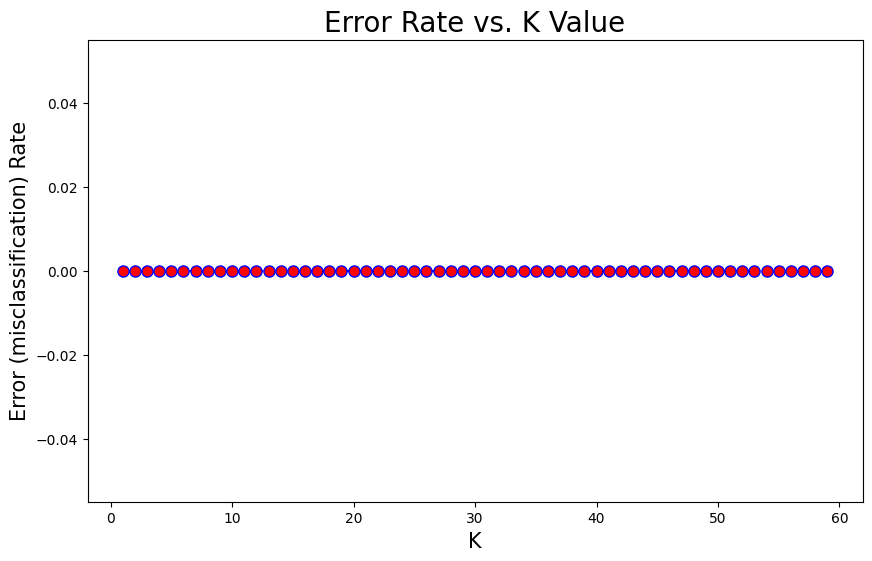

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)